In [2]:
import pandas as pd

df = pd.read_csv("Scarp_Project_Junior.csv")
df.head()


,Title,Company,Location,Link,Keyword,City,Description,Remote,PYTHON,SQL,...,BIG_DATA,MACHINE_LEARNING,ETL,MATPLOTLIB,PANDAS,NUMPY,DASHBOARD,REPORTING,Seniority,Lang
0,Junior Data Analyst,Zero To One Search | Recruitment Agency,"Leipzig, Saxony, Germany",https://de.linkedin.com/jobs/view/junior-data-...,Junior Data Analyst,Leipzig,"Junior Data Analyst Location : Leipzig, hybrid...",Yes,Yes,Yes,...,No,No,No,No,No,No,No,Yes,junior,en
1,Junior Data Analyst,Datalogue,"Hamburg, Hamburg, Germany",https://de.linkedin.com/jobs/view/junior-data-...,Junior Data Analyst,Hamburg,See all jobs (Junior)Data Analyst Permanent em...,Yes,Yes,Yes,...,No,Yes,No,No,No,No,No,No,junior,de
2,Junior Data Analyst,Instaffo,"Munich, Bavaria, Germany",https://de.linkedin.com/jobs/view/junior-data-...,Junior Data Analyst,Munich,Junior DATA ANALYST bei Base Camp Management C...,No,Yes,Yes,...,No,No,No,No,No,No,No,Yes,junior,de
3,Junior Data Analyst,Zero To One Search | Recruitment Agency,"Leipzig, Saxony, Germany",https://de.linkedin.com/jobs/view/junior-data-...,Junior Data Analyst,Leipzig,"Junior Data Analyst Location : Leipzig, hybrid...",Yes,Yes,Yes,...,No,No,No,No,No,No,No,Yes,junior,en
4,Junior Data Analyst,Datalogue,"Hamburg, Hamburg, Germany",https://de.linkedin.com/jobs/view/junior-data-...,Junior Data Analyst,Hamburg,See all jobs (Junior)Data Analyst Permanent em...,Yes,Yes,Yes,...,No,Yes,No,No,No,No,No,No,junior,de


C:\Users\kenih\AppData\Local\Temp\ipykernel_17976\215593607.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.index, y=skill_counts.values, palette="viridis")


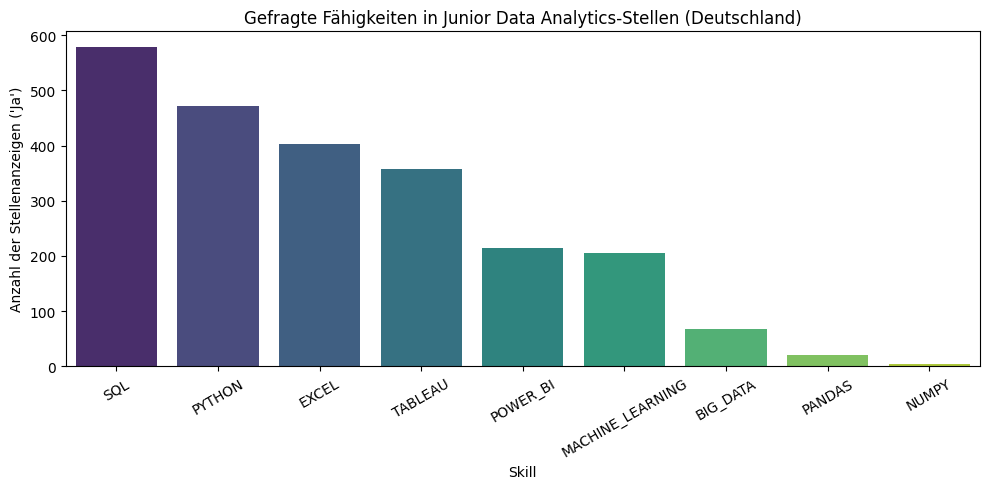

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Scarp_Project_Junior.csv")


skills = [
    "PYTHON", "SQL", "BIG_DATA", "MACHINE_LEARNING",
    "EXCEL", "POWER_BI", "TABLEAU", "PANDAS", "NUMPY"
]


skill_counts = df[skills].apply(lambda x: (x == "Yes").sum()).sort_values(ascending=False)


plt.figure(figsize=(10, 5))
sns.barplot(x=skill_counts.index, y=skill_counts.values, palette="viridis")
plt.title("Gefragte Fähigkeiten in Junior Data Analytics-Stellen (Deutschland)")
plt.xlabel("Skill")
plt.ylabel("Anzahl der Stellenanzeigen ('Ja')")
plt.xticks(rotation=30)
plt.tight_layout()


plt.savefig("skills_bar_chart.png", dpi=300)
plt.show()


C:\Users\kenih\AppData\Local\Temp\ipykernel_17976\932173098.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_bool = df[skills].applymap(lambda x: 1 if x == "Yes" else 0)


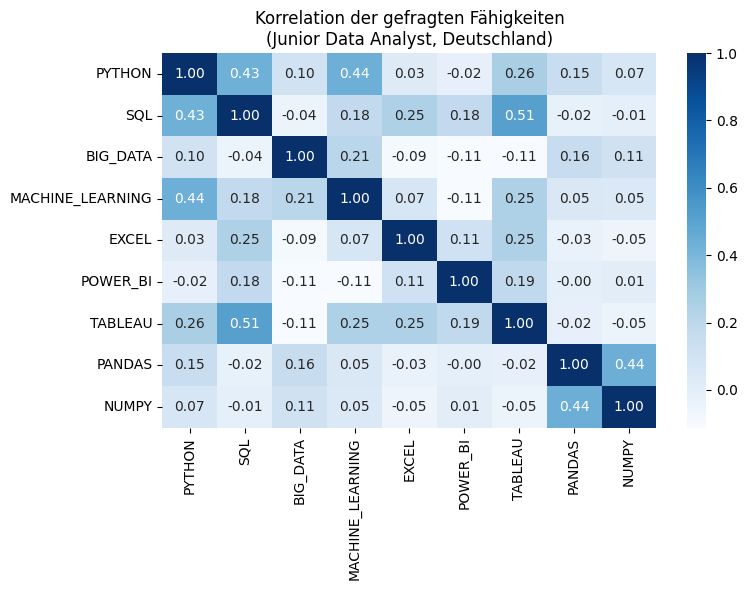

In [3]:
import numpy as np

df_bool = df[skills].applymap(lambda x: 1 if x == "Yes" else 0)

corr = df_bool.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Korrelation der gefragten Fähigkeiten\n(Junior Data Analyst, Deutschland)")
plt.tight_layout()
plt.savefig("skills_heatmap.png", dpi=300)
plt.show()


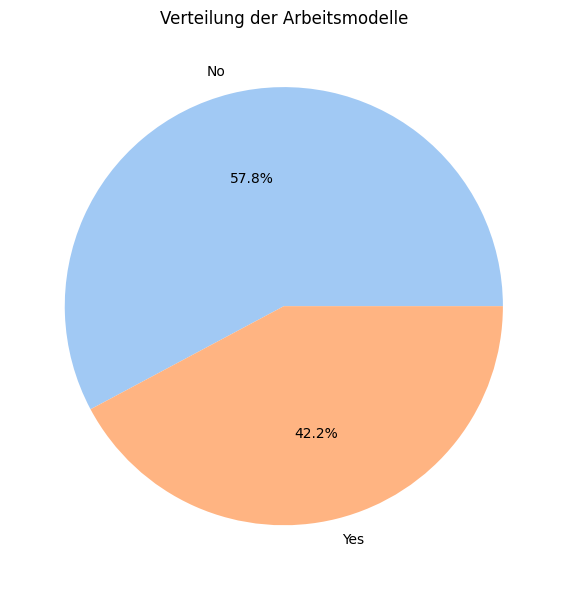

In [5]:
plt.figure(figsize=(6, 6))
df['Remote'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Verteilung der Arbeitsmodelle")
plt.ylabel('')
plt.tight_layout()
plt.savefig("remote_pie_chart.png", dpi=300)
plt.show()


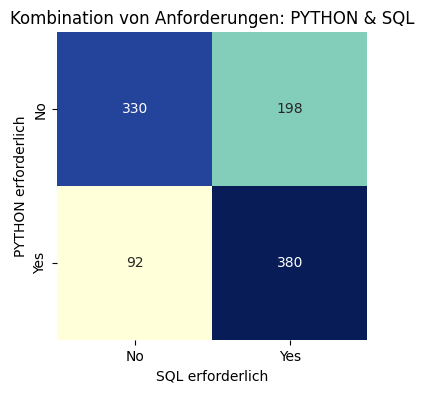

In [6]:
skill_x = 'PYTHON'
skill_y = 'SQL'

cross = pd.crosstab(df[skill_x], df[skill_y])

plt.figure(figsize=(4, 4))
sns.heatmap(
    cross,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar=False
)
plt.title(f"Kombination von Anforderungen: {skill_x} & {skill_y}")
plt.xlabel(f"{skill_y} erforderlich")
plt.ylabel(f"{skill_x} erforderlich")
plt.savefig(f"skills_heatmap_{skill_x.lower()}_{skill_y.lower()}.png", dpi=300)
plt.show()


C:\Users\kenih\AppData\Local\Temp\ipykernel_17976\2791349462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Lang', order=df['Lang'].value_counts().index, palette='pastel')


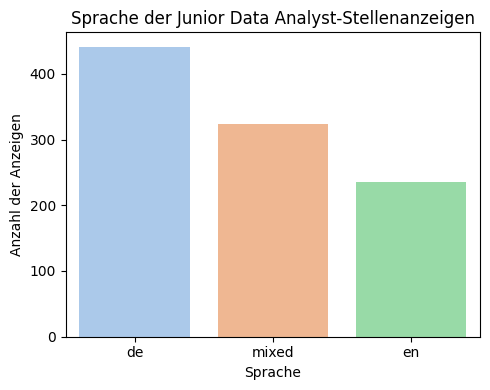

In [7]:

plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Lang', order=df['Lang'].value_counts().index, palette='pastel')
plt.title("Sprache der Junior Data Analyst-Stellenanzeigen")
plt.xlabel("Sprache")
plt.ylabel("Anzahl der Anzeigen")
plt.tight_layout()
plt.savefig("anzeigen_sprache.png", dpi=300)
plt.show()


C:\Users\kenih\AppData\Local\Temp\ipykernel_17976\3132096380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='flare')


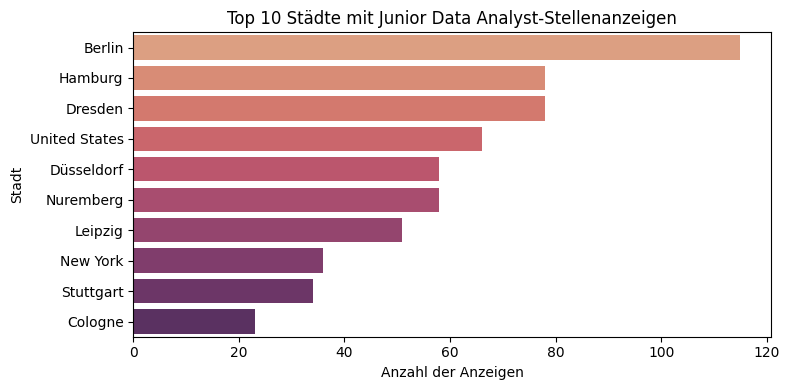

In [8]:
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(y=top_cities.index, x=top_cities.values, palette='flare')
plt.title("Top 10 Städte mit Junior Data Analyst-Stellenanzeigen")
plt.xlabel("Anzahl der Anzeigen")
plt.ylabel("Stadt")
plt.tight_layout()
plt.savefig("top10_staedte.png", dpi=300)
plt.show()


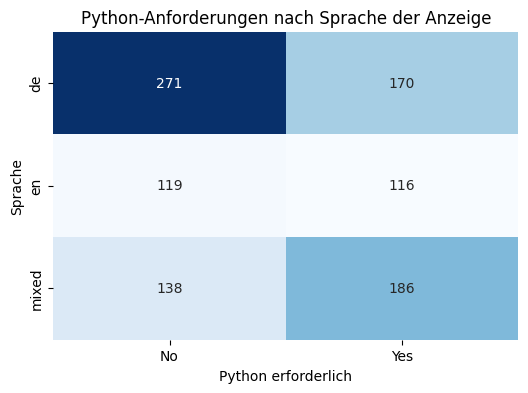

In [9]:
lang_skill = pd.crosstab(df['Lang'], df['PYTHON'])

plt.figure(figsize=(6, 4))
sns.heatmap(lang_skill, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Python-Anforderungen nach Sprache der Anzeige")
plt.xlabel("Python erforderlich")
plt.ylabel("Sprache")
plt.savefig("python_nach_sprache.png", dpi=300)
plt.show()


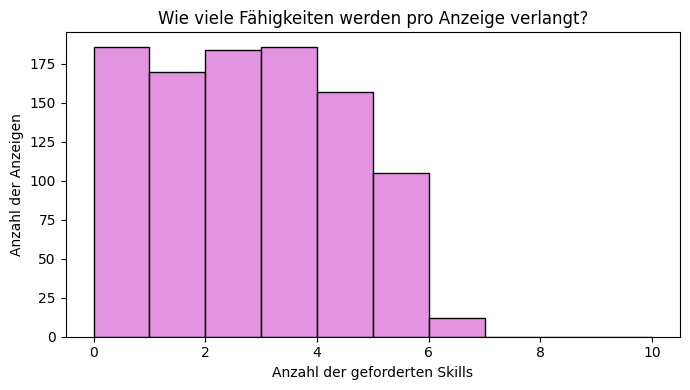

In [10]:

df['skills_sum'] = df[skills].apply(lambda x: (x == "Yes").sum(), axis=1)

plt.figure(figsize=(7, 4))
sns.histplot(df['skills_sum'], bins=range(0, len(skills)+2), color="orchid", kde=False)
plt.title("Wie viele Fähigkeiten werden pro Anzeige verlangt?")
plt.xlabel("Anzahl der geforderten Skills")
plt.ylabel("Anzahl der Anzeigen")
plt.tight_layout()
plt.savefig("skills_per_job_hist.png", dpi=300)
plt.show()
